In [1]:
import pandas as pd
import numpy as np

In [2]:
%pip install ipython
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import warnings
warnings.filterwarnings('ignore')  

pd.set_option('display.max_columns', None)

In [4]:
sharks_ori = pd.read_csv('attacks.csv', encoding='latin1')
sharks2 = sharks_ori.copy()

In [5]:
import pylab as plt
import seaborn as sns

%matplotlib inline

In [6]:
sharks_ori.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [7]:
sharks_ori.shape

(25723, 24)

In [8]:
sharks_ori.info(memory_usage='deep') #exploramos todos los nulos y el tipo de valor 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [9]:
## ELIMINAR VALORES DUPLICADOS

In [10]:
sharks_ori.drop_duplicates().shape==sharks_ori.shape #comprobamos si existen casos duplicados

False

In [11]:
sharks_ori.duplicated().any() #Esto es lo de arriba, pero por comprobar. Si true-si hay

True

In [12]:
sharks_ori.drop_duplicates().shape, sharks_ori.shape #con esto vemos la diferencia que se me queda entre nulos y original 

((6312, 24), (25723, 24))

In [13]:
#vamos a borrar todos los valores duplicados en primer lugar 

In [14]:
sharks_ori.drop_duplicates().head() #para eliminar todos los valores duplicados

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [15]:
sharks_ori=sharks_ori.drop_duplicates() #a mi shark inicial la llamo como a la de valores duplicados

In [16]:
sharks_ori.shape #Vemos con cuantos nos hemos quedado y estamos cerquita del limite establecido

(6312, 24)

In [17]:
#Hemos terminado de eliminar los valores duplicados y pasamos con el análisis de los valores nulos, 
#que el numero de valores nulos se ha reducido de los valores nulos originales porque muchos estaban duplicados

In [18]:
#VALORES NULOS

In [19]:
nan_cols=sharks_ori.isna().mean() * 100  # porcentaje de nulos por columna

nan_cols[nan_cols>0] #vemos de que columnas podemos borrar que el requisito es masde80%, encontramos 2

Case Number                0.031686
Date                       0.158428
Year                       0.190114
Type                       0.221800
Country                    0.950570
Area                       7.366920
Location                   8.713561
Activity                   8.776933
Name                       3.485425
Sex                        9.109632
Age                       45.009506
Injury                     0.602028
Fatal (Y/N)                8.697719
Time                      53.295311
Species                   45.120406
Investigator or Source     0.427757
pdf                        0.158428
href formula               0.174271
href                       0.158428
Case Number.1              0.158428
Case Number.2              0.158428
original order             0.047529
Unnamed: 22               99.984157
Unnamed: 23               99.968314
dtype: float64

In [20]:
sharks_ori.shape #vemos el numero de filas que nos quedan

(6312, 24)

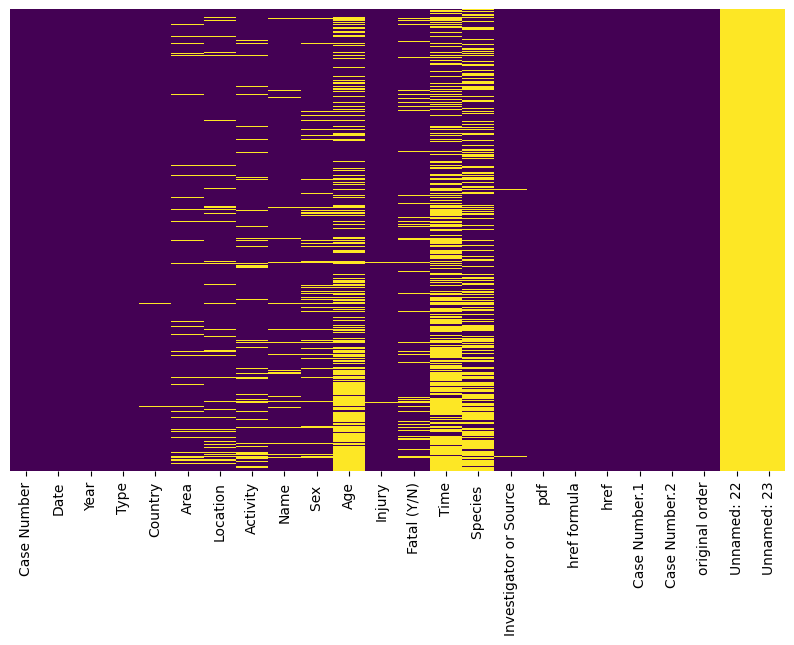

In [21]:
# grafico de nulos en el dataframe

plt.figure(figsize=(10, 6))  # inicia la figura y establece tamaño

sns.heatmap(sharks_ori.isna(),  # mapa de calor
           yticklabels=False,
           cmap='viridis',
           cbar=False)

plt.show()  #con este grafico comprobamos mirando el mapa de calor como las dos columnas de nulos tienen pechá

In [22]:
# vamos a eliminar las columnas con mayor valor nulo de 80%

cols=['Unnamed: 22', 'Unnamed: 23']

sharks_ori.drop(columns=cols, inplace=True)

In [23]:
sharks_ori.head() #vemos si nos ha eliminado las columnas

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0


In [24]:
nan_cols=sharks_ori.isna().mean() * 100  # porcentaje de nulos por columna

nan_cols[nan_cols>0] #vemos si nos ha eliminado las columnas de los valores nulos

Case Number                0.031686
Date                       0.158428
Year                       0.190114
Type                       0.221800
Country                    0.950570
Area                       7.366920
Location                   8.713561
Activity                   8.776933
Name                       3.485425
Sex                        9.109632
Age                       45.009506
Injury                     0.602028
Fatal (Y/N)                8.697719
Time                      53.295311
Species                   45.120406
Investigator or Source     0.427757
pdf                        0.158428
href formula               0.174271
href                       0.158428
Case Number.1              0.158428
Case Number.2              0.158428
original order             0.047529
dtype: float64

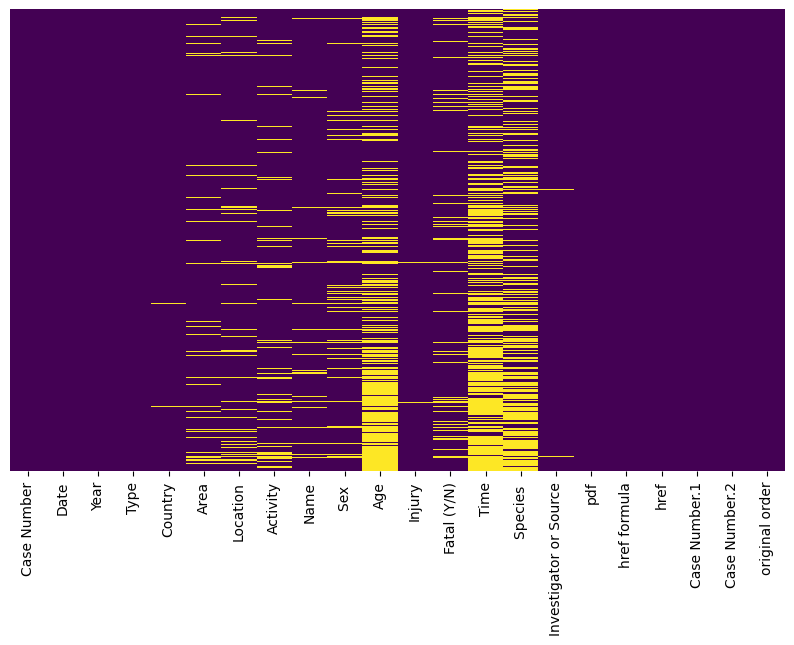

In [25]:
# grafico de nulos en el dataframe

plt.figure(figsize=(10, 6))  # inicia la figura y establece tamaño

sns.heatmap(sharks_ori.isna(),  # mapa de calor
           yticklabels=False,
           cmap='viridis',
           cbar=False)

plt.show() #Ahora vamos a ver el mapa despues de haber eliminado las columnas de nulos

In [26]:
#CORRECCIÓN DE VALORES 

In [27]:
sharks_ori.columns #para ver las columnas que tenemos

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order'],
      dtype='object')

In [28]:
sharks_ori.head() #Vemos que tenemos que corregir

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0


In [29]:
#Empezamos corrigiendo los titulos de las columnas

In [30]:
new_column = [] #Con esto cambiamos comas,puntos,nombres etc

for c in sharks_ori.columns:
    
    c = c.replace(" ","")
    
    c = c.replace(".","")
    
    c = c.replace("Fatal(Y/N)","Fatal")
    
    new_column.append(c)
    
sharks_ori.columns = new_column

In [31]:
sharks_ori.head() #comprobamos que se ha cambiado

,CaseNumber,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,InvestigatororSource,pdf,hrefformula,href,CaseNumber1,CaseNumber2,originalorder
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0


In [32]:
sharks_ori.fillna('Unknown', inplace=True) #Vamos a cambiar los valores nulos por unknown

In [33]:
sharks_ori.head() #comprobamos que todos los valores pone Unknown

,CaseNumber,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,InvestigatororSource,pdf,hrefformula,href,CaseNumber1,CaseNumber2,originalorder
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,Unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,Unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,Unknown,Minor injury to lower leg,N,Unknown,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,Unknown,Lacerations to leg & hand shark PROVOKED INCIDENT,N,Unknown,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0


In [34]:
# Case Number y Date me dan la misma info.
# 1º voy a modificar el contenido de CaseNumber para que solo me salgan las fechas en formato aaaa/mm/dd
# 2º sustituir el contenido en Date por el de CaseNumber y que se muestre con un orden cronologico
# 3º enumerar CaseNumber por filas

In [35]:
lst=[]

for x in sharks_ori.CaseNumber:
    
    lst.append('-'.join(x.split('.')[:3]))
lst #tengo una lista convertida a fecha pero no se como incluirla

['2018-06-25',
 '2018-06-18',
 '2018-06-09',
 '2018-06-08',
 '2018-06-04',
 '2018-06-03',
 '2018-06-03',
 '2018-05-27',
 '2018-05-26',
 '2018-05-26',
 '2018-05-24',
 '2018-05-21',
 '2018-05-13',
 '2018-05-13',
 '2018-05-00',
 '2018-05-12',
 '2018-05-09',
 '2018-04-30',
 '2018-04-28',
 '2018-04-28',
 '2018-04-25',
 '2018-04-25',
 '2018-04-24',
 '2018-04-23',
 '2018-04-22',
 '2018-04-19',
 '2018-04-15',
 '2018-04-15',
 '2018-04-15',
 '2018-04-15',
 '2018-04-14',
 '2018-04-10',
 '2018-04-09',
 '2018-04-05',
 '2018-04-03',
 '2018-03-31',
 '2018-03-14',
 '2018-03-09',
 '2018-03-09',
 '2018-02-24',
 '2018-02-23',
 '2018-02-17',
 '2018-02-15',
 '2018-02-14',
 '2018-02-11',
 '2018-02-03',
 '2018-02-01',
 '2018-01-28',
 '2018-01-21',
 '2018-01-14',
 '2018-01-13',
 '2018-01-12',
 '2018-01-05',
 '2017-12-31',
 '2017-12-30',
 '2017-12-21',
 '2017-12-09',
 '2017-11-30',
 '2017-11-30',
 '2017-11-25',
 '2017-11-24',
 '2017-11-18',
 '2017-11-13',
 '2017-11-13',
 '2017-11-04',
 '2017-10-31',
 '2017-10-

In [36]:
sharks_ori['CaseNumber']=lst #SOBREESCRIBIR la lista a la columna 

In [37]:
 sharks_ori.CaseNumber.value_counts() #Hay que quitarle las letras y convertirlo a fecha

1950-00-00    13
1957-00-00    11
1942-00-00    11
1960-00-00    10
1958-00-00     9
              ..
1994-04-16     1
1994-05-15     1
1994-05-23     1
1994-05-24     1
xx             1
Name: CaseNumber, Length: 5337, dtype: int64

In [38]:
print(list(sharks_ori['CaseNumber'].unique()))
#veo que hay un monton de valores que no son fechas

['2018-06-25', '2018-06-18', '2018-06-09', '2018-06-08', '2018-06-04', '2018-06-03', '2018-05-27', '2018-05-26', '2018-05-24', '2018-05-21', '2018-05-13', '2018-05-00', '2018-05-12', '2018-05-09', '2018-04-30', '2018-04-28', '2018-04-25', '2018-04-24', '2018-04-23', '2018-04-22', '2018-04-19', '2018-04-15', '2018-04-14', '2018-04-10', '2018-04-09', '2018-04-05', '2018-04-03', '2018-03-31', '2018-03-14', '2018-03-09', '2018-02-24', '2018-02-23', '2018-02-17', '2018-02-15', '2018-02-14', '2018-02-11', '2018-02-03', '2018-02-01', '2018-01-28', '2018-01-21', '2018-01-14', '2018-01-13', '2018-01-12', '2018-01-05', '2017-12-31', '2017-12-30', '2017-12-21', '2017-12-09', '2017-11-30', '2017-11-25', '2017-11-24', '2017-11-18', '2017-11-13', '2017-11-04', '2017-10-31', '2017-10-28', '2017-10-26', '2017-10-23', '2017-10-22', '2017-10-21', '2017-10-18', '2017-10-09', '2017-10-05', '2017-10-01', '2017-09-25', '2017-09-24', '2017-09-20', '2017-09-16', '2017-09-15', '2017-09-14', '2017-09-13', '2017

In [39]:
sharks_ori['CaseNumber'][sharks_ori['CaseNumber'].str.startswith('ND')] = 'Unknown' #quito todos los ND

In [40]:
sharks_ori['CaseNumber'][sharks_ori['CaseNumber'].str.startswith('0')] = 'Unknown' #quito todos los 0

In [41]:
sharks_ori['CaseNumber'][sharks_ori['CaseNumber'].str.startswith('x')] = 'Unknown' #quito todos los x

In [42]:
print(list(sharks_ori['CaseNumber'].unique()))
#veo que hay un monton de valores que no son fechas

['2018-06-25', '2018-06-18', '2018-06-09', '2018-06-08', '2018-06-04', '2018-06-03', '2018-05-27', '2018-05-26', '2018-05-24', '2018-05-21', '2018-05-13', '2018-05-00', '2018-05-12', '2018-05-09', '2018-04-30', '2018-04-28', '2018-04-25', '2018-04-24', '2018-04-23', '2018-04-22', '2018-04-19', '2018-04-15', '2018-04-14', '2018-04-10', '2018-04-09', '2018-04-05', '2018-04-03', '2018-03-31', '2018-03-14', '2018-03-09', '2018-02-24', '2018-02-23', '2018-02-17', '2018-02-15', '2018-02-14', '2018-02-11', '2018-02-03', '2018-02-01', '2018-01-28', '2018-01-21', '2018-01-14', '2018-01-13', '2018-01-12', '2018-01-05', '2017-12-31', '2017-12-30', '2017-12-21', '2017-12-09', '2017-11-30', '2017-11-25', '2017-11-24', '2017-11-18', '2017-11-13', '2017-11-04', '2017-10-31', '2017-10-28', '2017-10-26', '2017-10-23', '2017-10-22', '2017-10-21', '2017-10-18', '2017-10-09', '2017-10-05', '2017-10-01', '2017-09-25', '2017-09-24', '2017-09-20', '2017-09-16', '2017-09-15', '2017-09-14', '2017-09-13', '2017

In [43]:
sharks_ori.head() #Ya tengo los valores de CaseNumber corregidos

,CaseNumber,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,InvestigatororSource,pdf,hrefformula,href,CaseNumber1,CaseNumber2,originalorder
0,2018-06-25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018-06-18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,Unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018-06-09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,Unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018-06-08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,Unknown,Minor injury to lower leg,N,Unknown,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018-06-04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,Unknown,Lacerations to leg & hand shark PROVOKED INCIDENT,N,Unknown,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0


In [44]:
#LIMPIEZA COLUMNA TYPE

In [45]:
sharks_ori['Type'].value_counts() #Vamos a introducir las questionables en unknown, 
# y vamos a introducir boatomg y boating en boar

Unprovoked      4595
Provoked         574
Invalid          547
Sea Disaster     239
Boating          203
Boat             137
Unknown           14
Questionable       2
Boatomg            1
Name: Type, dtype: int64

In [46]:
sharks_ori['Type'].replace(['Boating', 'Boatomg', 'Questionable'],['Boat', 'Boat', 'Unknown'], inplace=True) #hemos puesto los valores en Boat

In [47]:
sharks_ori['Type'].value_counts() #Vemos que hemos ya tenemos boat 


Unprovoked      4595
Provoked         574
Invalid          547
Boat             341
Sea Disaster     239
Unknown           16
Name: Type, dtype: int64

In [48]:
# LIMPIEZA COLUMNA COUNTRY

In [49]:
sharks_ori['Country'].value_counts()  #exploración de los paises

USA                      2229
AUSTRALIA                1338
SOUTH AFRICA              579
PAPUA NEW GUINEA          134
NEW ZEALAND               128
                         ... 
THE BALKANS                 1
NORTH ATLANTIC OCEAN        1
MAYOTTE                     1
GABON                       1
CEYLON (SRI LANKA)          1
Name: Country, Length: 213, dtype: int64

In [50]:
paises_unknown = sharks_ori['Country'].value_counts()
paises_unknown[paises_unknown<50] #Todos estos paises no relevantes en el analisis

CUBA                     46
MOZAMBIQUE               45
SPAIN                    44
INDIA                    40
EGYPT                    38
                         ..
THE BALKANS               1
NORTH ATLANTIC OCEAN      1
MAYOTTE                   1
GABON                     1
CEYLON (SRI LANKA)        1
Name: Country, Length: 199, dtype: int64

In [51]:
pais_no = list(paises_unknown[paises_unknown<50].index)
pais_no

['CUBA',
 'MOZAMBIQUE',
 'SPAIN',
 'INDIA',
 'EGYPT',
 'CROATIA',
 'JAPAN',
 'PANAMA',
 'SOLOMON ISLANDS',
 'IRAN',
 'JAMAICA',
 'FRENCH POLYNESIA',
 'GREECE',
 'HONG KONG',
 'ENGLAND',
 'INDONESIA',
 'PACIFIC OCEAN',
 'ATLANTIC OCEAN',
 'COSTA RICA',
 'BERMUDA',
 'VIETNAM',
 'TONGA',
 'SRI LANKA',
 'VANUATU',
 'MARSHALL ISLANDS',
 'FRANCE',
 'CANADA',
 'SOUTH ATLANTIC OCEAN',
 'IRAQ',
 'TURKEY',
 'VENEZUELA',
 'UNITED KINGDOM',
 'SENEGAL',
 'MAURITIUS',
 'KENYA',
 'NEW GUINEA',
 'TAIWAN',
 'COLUMBIA',
 'ECUADOR',
 'SOUTH KOREA',
 'MADAGASCAR',
 'SCOTLAND',
 'SAMOA',
 'CHILE',
 'TANZANIA',
 'THAILAND',
 'CARIBBEAN SEA',
 'SIERRA LEONE',
 'YEMEN ',
 'CHINA',
 'INDIAN OCEAN',
 'ISRAEL',
 'NORTH PACIFIC OCEAN',
 'DOMINICAN REPUBLIC',
 'SEYCHELLES',
 'NEW BRITAIN',
 'SOMALIA',
 'BARBADOS',
 'LIBYA',
 'NICARAGUA',
 'SINGAPORE',
 'KIRIBATI',
 'OKINAWA',
 'MID ATLANTIC OCEAN',
 'MALTA',
 'MALAYSIA',
 'AZORES',
 'TURKS & CAICOS',
 'SAUDI ARABIA',
 'PALAU',
 'NORTH ATLANTIC OCEAN',
 'URUGUAY',


In [52]:
sharks_ori['Country'].replace(pais_no, "Unknown", inplace=True)

In [53]:
sharks_ori['Country'].value_counts()

USA                 2229
AUSTRALIA           1338
Unknown             1287
SOUTH AFRICA         579
PAPUA NEW GUINEA     134
NEW ZEALAND          128
BRAZIL               112
BAHAMAS              109
MEXICO                89
ITALY                 71
FIJI                  62
PHILIPPINES           61
REUNION               60
NEW CALEDONIA         53
Name: Country, dtype: int64

In [54]:
#Con esta limpieza perdemos solo un 1,052% de la información

In [55]:
sharks_ori.head()

,CaseNumber,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,InvestigatororSource,pdf,hrefformula,href,CaseNumber1,CaseNumber2,originalorder
0,2018-06-25,25-Jun-2018,2018.0,Boat,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018-06-18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,Unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018-06-09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,Unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018-06-08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,Unknown,Minor injury to lower leg,N,Unknown,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018-06-04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,Unknown,Lacerations to leg & hand shark PROVOKED INCIDENT,N,Unknown,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0


In [56]:
#LIMPIEZA COLUMNA FATAL

In [57]:
sharks_ori['Fatal'].value_counts()

N          4293
Y          1388
Unknown     549
UNKNOWN      71
 N            7
M             1
2017          1
N             1
y             1
Name: Fatal, dtype: int64

In [58]:
sharks_ori['Fatal'].replace(['M','2017','UNKNOWN'], "Unknown", inplace=True) #limpio los datos extraños

In [59]:
sharks_ori['Fatal'].replace(['y'], "Y", inplace=True)

In [60]:
sharks_ori['Fatal'].replace([' N','N '], "Y", inplace=True)

In [61]:
sharks_ori['Fatal'].value_counts() 

N          4293
Y          1397
Unknown     622
Name: Fatal, dtype: int64

In [62]:
keyword = '.' #sirve para buscar en mi dataframe
select2 = sharks_ori[sharks_ori.Fatal.str.contains(keyword, regex=True)]
select2.head()

,CaseNumber,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,InvestigatororSource,pdf,hrefformula,href,CaseNumber1,CaseNumber2,originalorder
0,2018-06-25,25-Jun-2018,2018.0,Boat,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018-06-18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,Unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018-06-09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,Unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018-06-08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,Unknown,Minor injury to lower leg,N,Unknown,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018-06-04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,Unknown,Lacerations to leg & hand shark PROVOKED INCIDENT,N,Unknown,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0


In [63]:
print(list(sharks_ori['Fatal'].unique())) #ya tenemos limpia Fatal

['N', 'Y', 'Unknown']


In [64]:
#LIMPIAMOS COLUMNA SPECIE

In [65]:
print(list(sharks_ori['Species'].unique()))

['White shark', 'Unknown', '2 m shark', 'Tiger shark, 3m', 'Tiger shark', "Lemon shark, 3'", "Bull shark, 6'", 'Grey reef shark', 'Invalid incident', 'Tawny nurse shark, 2m', 'Shark involvement not confirmed', 'Questionable', '3 m shark', 'White shark, 3.5 m', 'White shark, 2.5 m', "6' shark", 'Juvenile bull shark', 'Bull shark', "Tiger shark, 12'", 'Wobbegong shark', '3.5 m shark', '1.8 m shark', 'Blacktip shark', 'Juvenile white shark,  2.7 to 3.2 m', 'Bull shark, 2 m', 'Possibly a wobbegong', 'Injury believed caused by an eel, not a shark', 'Galapagos shark?', '2m shark', 'Bull shark, 3 m ', 'Grey reef shark. 2 m', 'small shark', 'Wobbegong shark?', 'Juvenile nurse shark', "Nurse shark. 5'", 'Tiger shark, female', 'Some drowned but other may have been killed by blue sharks', 'White shark, 4.6 m', 'Cookiecutter shark', 'Wobbegong shark, 1 m', 'White shark, 4.5 m', 'Spinner shark, 4 to 5 feet', 'Tiger shark, 8 to 10 feet', "8' shark", 'Death may have been due to drowning', "5' shark",

In [66]:
sharks_ori['Species'].value_counts() 

Unknown                                                                                                                          2849
White shark                                                                                                                       163
Shark involvement prior to death was not confirmed                                                                                105
Invalid                                                                                                                           102
Shark involvement not confirmed                                                                                                    88
                                                                                                                                 ... 
1.2 m to 1.5 m [4.5' to 5'] shark                                                                                                   1
Bull shark, 2.3 m [7.5']                                      

In [67]:
#LIMPIAMOS COLUMNA SEX

In [68]:
sharks_ori['Sex'].value_counts() 

M          5094
F           637
Unknown     575
M             2
N             2
lli           1
.             1
Name: Sex, dtype: int64

In [69]:
keyword2 = 'lli' #sirve para buscar en mi dataframe
select3 = sharks_ori[sharks_ori.Sex.str.contains(keyword2, regex=True)]
select3.head()

,CaseNumber,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,InvestigatororSource,pdf,hrefformula,href,CaseNumber1,CaseNumber2,originalorder
1624,2004-11-11,11-Nov-2004,2004.0,Unprovoked,USA,California,"Bunkers, Humboldt Bay, Eureka, Humboldt County",Surfing,Brian Kang,lli,38,"Lacerations to hand, knee & thigh",N,13h30,5.5 m [18'] white shark,"R. Collier, GSAF",2004.11.11.b-Kang.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2004.11.11.b,2004.11.11.b,4679.0


In [70]:
sharks_ori['Sex'].replace(['N','.'], "Unknown", inplace=True)

In [71]:
print(list(sharks_ori['Sex'].unique())) #Lo pongo así para darme cuenta de los espacios en los valores

['F', 'M', 'Unknown', 'M ', 'lli']


In [72]:
sharks_ori['Sex'].replace(['M ','lli'], "M", inplace=True)

In [73]:
sharks_ori['Sex'].value_counts() #Vemos como ha quedado

M          5097
F           637
Unknown     578
Name: Sex, dtype: int64

In [74]:
sharks_ori.head()

,CaseNumber,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,InvestigatororSource,pdf,hrefformula,href,CaseNumber1,CaseNumber2,originalorder
0,2018-06-25,25-Jun-2018,2018.0,Boat,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018-06-18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,Unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018-06-09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,Unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018-06-08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,Unknown,Minor injury to lower leg,N,Unknown,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018-06-04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,Unknown,Lacerations to leg & hand shark PROVOKED INCIDENT,N,Unknown,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0


In [78]:
#LIMPIAMOS COLUMNA EDAD

In [95]:
sharks_ori["Age"] = sharks_ori["Age"].replace({">50":"Unknown","20s":"25", "30s":"35", "teen": "15", "Teen": "15", "mid-30s":"35", "21 or 26":"24", "60's":"65", "60s":"65","32 & 30":"31","16 to 18":"17", "12 or 13":"12", "50s":"55", "9 & 12":"9", "Elderly": "12", "6½":"6"})

In [94]:
sharks_ori['Age'].value_counts() 

Unknown     2842
17           155
15           153
18           150
19           142
            ... 
18 to 22       1
adult          1
? & 19         1
9 months       1
13 or 14       1
Name: Age, Length: 142, dtype: int64

,CaseNumber,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,InvestigatororSource,pdf,hrefformula,href,CaseNumber1,CaseNumber2,originalorder
0,2018-06-25,25-Jun-2018,2018.0,Boat,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018-06-18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,Unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018-06-09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,Unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018-06-08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,Unknown,Minor injury to lower leg,N,Unknown,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018-06-04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,Unknown,Lacerations to leg & hand shark PROVOKED INCIDENT,N,Unknown,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0
